In [1]:
import h5py
import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import os
import math
from scipy.interpolate import make_smoothing_spline, make_splrep, interp1d

import importlib 
import tools
importlib.reload(tools)

from tools import bin_data  

In [78]:
data = np.load('/sdf/data/neutrino/summer25/seohyeon/edep_estimators/muon1k_0-1gev_estimators_edep_cleaned.npz')

energies = data['energies']
naive =data['naive']
detailed = data['detailed']
edep = data['edep']

print(len(energies))


N = len(energies)
tr_N = math.ceil(N/2)


ncut=4
nbins=40

53937


In [89]:
# training data-----
tr_energies = energies[:tr_N]

tr_naive = naive[:tr_N]
tr_naive_x, tr_naive_y, tr_naive_errors, tr_naive_rrms = bin_data(tr_naive, tr_energies, nbins)

# to prevent the binning curve
# tr_naive_x = tr_naive_x[:-ncut]
# tr_naive_y = tr_naive_y[:-ncut]
tr_naive_x = np.insert(tr_naive_x, 0, np.min(tr_naive))
tr_naive_y = np.insert(tr_naive_y, 0, tr_energies[np.argmin(tr_naive)])


# testing data------
te_energies = energies[tr_N:N]
te_naive = naive[tr_N:N]
te_naive_x, te_naive_y, te_naive_errors, te_naive_rrms = bin_data(te_naive, te_energies, nbins)

# te_naive_x = te_naive_x[:-ncut]
# te_naive_y = te_naive_y[:-ncut]
te_naive_x = np.insert(te_naive_x, 0, np.min(te_naive))
te_naive_y = np.insert(te_naive_y, 0, te_energies[np.argmin(te_naive)])


# optimizing s
least_squares = []
for s in range(500):
    tr_naive_spl = make_splrep(tr_naive_x, tr_naive_y, s=s)

    ls = 0
    for i, pt in enumerate(te_naive_x):
        spline_pt = tr_naive_spl(pt)
        test_pt = te_naive_y[i]
    
        ls += (test_pt - spline_pt) **2 

    least_squares.append(ls)

s = least_squares.index(min(least_squares))
print(s)
naive_spl = make_splrep(tr_naive_x, tr_naive_y, s=s)

10


Text(0, 0.5, '$T_\\mu$ (MeV)')

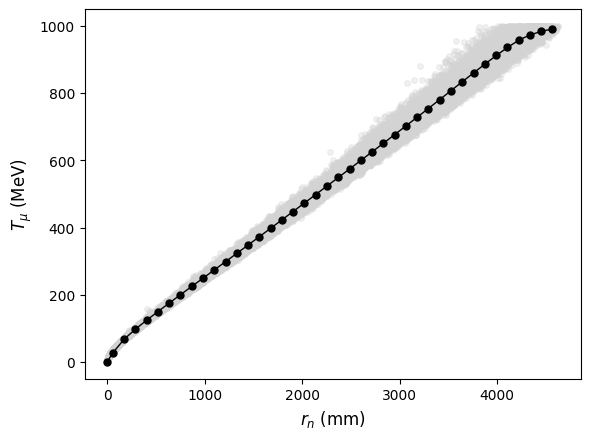

In [84]:
plt.figure()
plt.plot(naive, energies, 'o', ms=4, color='lightgray', alpha=0.3)
plt.plot(tr_naive_x, tr_naive_y, 'o', ms=5, color='black')
plt.plot(tr_naive_x, naive_spl(tr_naive_x), linewidth=1, color='black')
plt.xlabel(r'$r_n$ (mm)', fontsize=12)
plt.ylabel(r'$T_\mu$ (MeV)', fontsize=12)
# plt.title(f'true muon KE vs. naive length, {total_evs} events', fontsize=16)
# plt.savefig(f'Plots/residuals/naive_fit_{total_evs}evs.png')

In [90]:
# training data-----
tr_detailed = detailed[:tr_N]
tr_detailed_x, tr_detailed_y, tr_detailed_errors, tr_detailed_rrms = bin_data(tr_detailed, tr_energies, nbins)

# to prevent the binning curve
# tr_detailed_x = tr_detailed_x[:-ncut]
# tr_detailed_y = tr_detailed_y[:-ncut]
tr_detailed_x = np.insert(tr_detailed_x, 0, np.min(tr_detailed))
tr_detailed_y = np.insert(tr_detailed_y, 0, tr_energies[np.argmin(tr_detailed)])


# testing data------
te_detailed = detailed[tr_N:N]
te_detailed_x, te_detailed_y, te_detailed_errors, te_detailed_rrms = bin_data(te_detailed, te_energies, nbins)

# te_detailed_x = te_detailed_x[:-ncut]
# te_detailed_y = te_detailed_y[:-ncut]
te_detailed_x = np.insert(te_detailed_x, 0, np.min(te_detailed))
te_detailed_y = np.insert(te_detailed_y, 0, te_energies[np.argmin(te_detailed)])


# optimizing s
least_squares = []
for s in range(500):
    tr_detailed_spl = make_splrep(tr_detailed_x, tr_detailed_y, s=s)

    ls = 0
    for i, pt in enumerate(te_detailed_x):
        spline_pt = tr_detailed_spl(pt)
        test_pt = te_detailed_y[i]
    
        ls += (test_pt - spline_pt) **2 

    least_squares.append(ls)

s = least_squares.index(min(least_squares))
print(s)
detailed_spl = make_splrep(tr_detailed_x, tr_detailed_y, s=s)

15


Text(0.5, 1.0, 'true muon KE vs. detailed length')

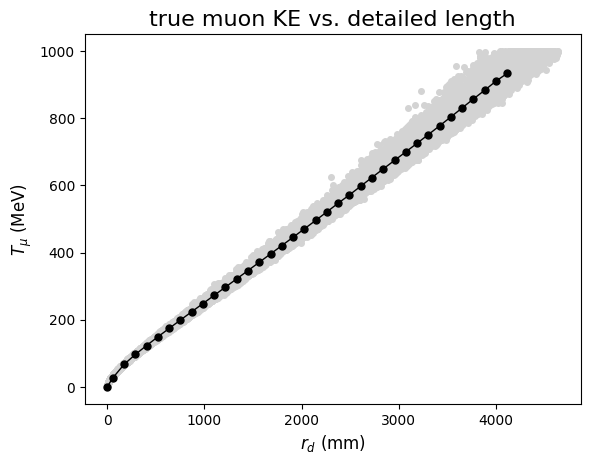

In [88]:
# plt.figure()
# plt.plot(tr_detailed_x, tr_detailed_y, 'o')
# plt.plot(te_detailed_x, te_detailed_y, 'o')

plt.figure()
plt.plot(detailed, energies, 'o', ms=4, color='lightgray')
plt.plot(tr_detailed_x, tr_detailed_y, 'o', ms=5, color='black')
plt.plot(tr_detailed_x, detailed_spl(tr_detailed_x), linewidth=1, color='black')
plt.xlabel(r'$r_d$ (mm)', fontsize=12)
plt.ylabel(r'$T_\mu$ (MeV)', fontsize=12)
plt.title(f'true muon KE vs. detailed length', fontsize=16)
# plt.savefig(f'plots/residuals/detailed_fit.png')


# for i, val in enumerate(energies):
#     if val > 610 and detailed[i] < 2350:
#         print(i + 51)
#         print(val)
#         print(detailed[i])
        


In [91]:
# training data-----
tr_edeps = edep[:tr_N]
tr_edeps_x, tr_edeps_y, tr_edeps_errors, tr_edeps_rrms = bin_data(tr_edeps, tr_energies, nbins)

# to prevent the binning curve
# tr_edeps_x = tr_edeps_x[:-ncut]
# tr_edeps_y = tr_edeps_y[:-ncut]
tr_edeps_x = np.insert(tr_edeps_x, 0, np.min(tr_edeps))
tr_edeps_y = np.insert(tr_edeps_y, 0, tr_energies[np.argmin(tr_edeps)])


# testing data------
te_edeps = edep[tr_N:N]
te_edeps_x, te_edeps_y, te_edeps_errors, te_edeps_rrms = bin_data(te_edeps, te_energies, nbins)

# te_edeps_x = te_edeps_x[:-ncut]
# te_edeps_y = te_edeps_y[:-ncut]
te_edeps_x = np.insert(te_edeps_x, 0, np.min(te_edeps))
te_edeps_y = np.insert(te_edeps_y, 0, te_energies[np.argmin(te_edeps)])


# optimizing s
least_squares = []
for s in range(100):
    tr_edeps_spl = make_splrep(tr_edeps_x, tr_edeps_y, s=s)

    ls = 0
    for i, pt in enumerate(te_edeps_x):
        spline_pt = tr_edeps_spl(pt)
        test_pt = te_edeps_y[i]
    
        ls += (test_pt - spline_pt) **2 

    least_squares.append(ls)

s = least_squares.index(min(least_squares))
print(s)
edeps_spl = make_splrep(tr_edeps_x, tr_edeps_y, s=s)

13


Text(0, 0.5, '$T_\\mu$ (MeV)')

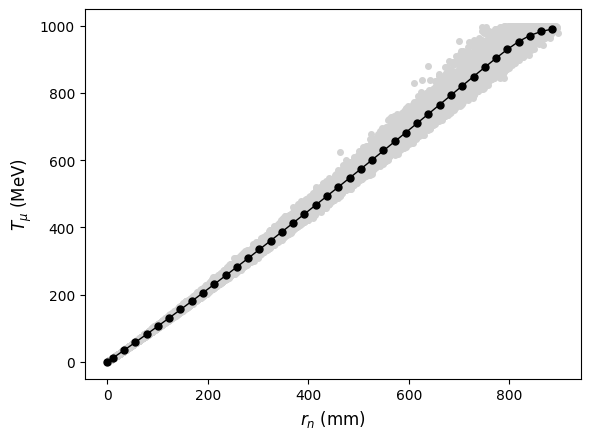

In [17]:
plt.figure()
plt.plot(edep, energies, 'o', ms=4, color='lightgray')
plt.plot(tr_edeps_x, tr_edeps_y, 'o', ms=5, color='black')
plt.plot(tr_edeps_x, edeps_spl(tr_edeps_x), linewidth=1, color='black')
plt.xlabel(r'$r_n$ (mm)', fontsize=12)
plt.ylabel(r'$T_\mu$ (MeV)', fontsize=12)
# plt.title(f'true muon KE vs. edep, {total_evs} events', fontsize=16)
# plt.savefig(f'Plots/residuals/edep_fit_{total_evs}evs.png')

In [93]:
np.savez('/sdf/data/neutrino/summer25/seohyeon/efxns/efxns54k_truth.npz', naive_t = naive_spl.t, naive_c = naive_spl.c, naive_k = naive_spl.k,
        detailed_t = detailed_spl.t, detailed_c = detailed_spl.c, detailed_k = detailed_spl.k,
        edep_t = edeps_spl.t, edep_c = edeps_spl.c, edep_k = edeps_spl.k)